In [4]:
!pip install shap

In [5]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import xgboost as xgb
from sklearn.metrics import accuracy_score,confusion_matrix

import shap
shap.initjs()

In [6]:
#import dataset
data = pd.read_csv("/content/abalone.data")
data.head()

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [7]:
data = pd.read_csv("/content/abalone.data",
                   names=["sex","length","diameter","height",
                         "whole weight","shucked weight",
                         "viscera weight","shell weight",
                         "rings"])
data.head()

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [8]:
#Get features
y = data['rings']
X = data[["sex","length","height",
          "shucked weight","viscera weight","shell weight"]]

In [9]:
#Create dummy variables
X['sex.M'] = [1 if s == 'M' else 0 for s in X['sex']]
X['sex.F'] = [1 if s == 'F' else 0 for s in X['sex']]
X['sex.I'] = [1 if s == 'I' else 0 for s in X['sex']]
X = X.drop('sex', axis=1)

<ipython-input-9-d9d2b0e84184>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sex.M'] = [1 if s == 'M' else 0 for s in X['sex']]
<ipython-input-9-d9d2b0e84184>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sex.F'] = [1 if s == 'F' else 0 for s in X['sex']]


In [10]:
X.head()

,length,height,shucked weight,viscera weight,shell weight,sex.M,sex.F,sex.I
0,0.455,0.095,0.2245,0.1010,0.150,1,0,0
1,0.350,0.090,0.0995,0.0485,0.070,1,0,0
2,0.530,0.135,0.2565,0.1415,0.210,0,1,0
3,0.440,0.125,0.2155,0.1140,0.155,1,0,0
4,0.330,0.080,0.0895,0.0395,0.055,0,0,1


# Binary target variable

In [11]:
y_bin = [1 if r >= 10 else 0 for r in y]

In [12]:
# train model
model = xgb.XGBClassifier(objective="binary:logistic")
model.fit(X, y_bin)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [13]:
# get shap values
# explainer = shap.TreeExplainer(model)
# shap_values = explainer.shap_values(X)
explainer = shap.Explainer(model)
shap_values = explainer(X)

print(shap_values.shape)

(4177, 8)


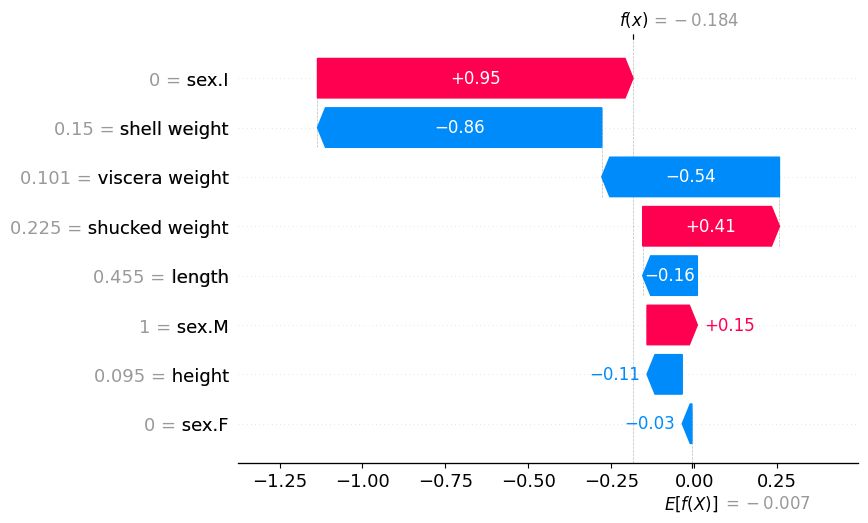

In [14]:
# waterfall plot for first obs
shap.plots.waterfall(shap_values[0])

`E[f(x)]` = average predicted log odds <br>
`f(x)` = predicted log odds <br>
Positive shap values are interpreted as increasing the log odds. For example, shucked weight increased the log odds by 0.41. We can said that this feature increase the probability the model will predict average number of rings.

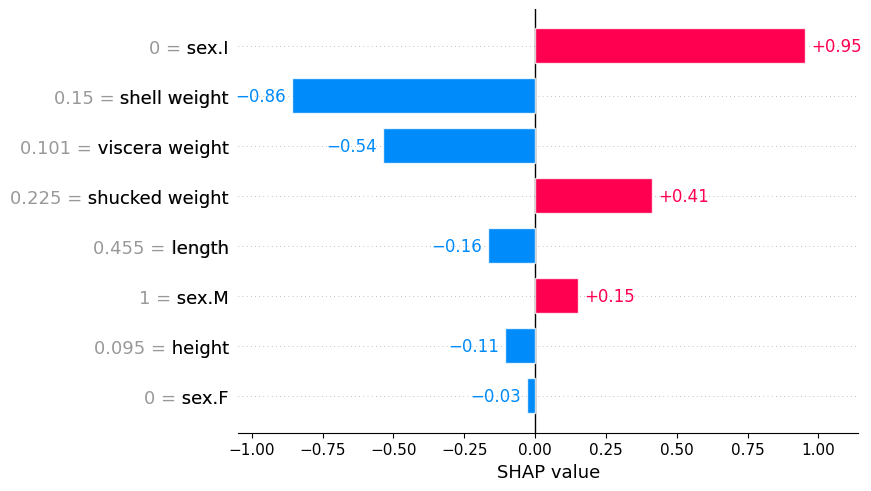

In [15]:
# bar plot for first obs
shap.plots.bar(shap_values[0])
# shap.plots.bar(shap_values)

# For multiclass

In [20]:
# categorical target variable
y_cat = [2 if y_ > 12 else 1 if y_ > 8 else 0 for y_ in y]
#y_cat

In [17]:
#train model
model = xgb.XGBClassifier(objective="multi:softmax")
model.fit(X, y_cat)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [18]:
# get probability prediction
model.predict_proba(X)[0]

array([0.2975808 , 0.19655097, 0.50586826], dtype=float32)

In [21]:
# get shap values
explainer = shap.Explainer(model)
shap_values = explainer(X)

print(shap_values.shape)

(4177, 8, 3)


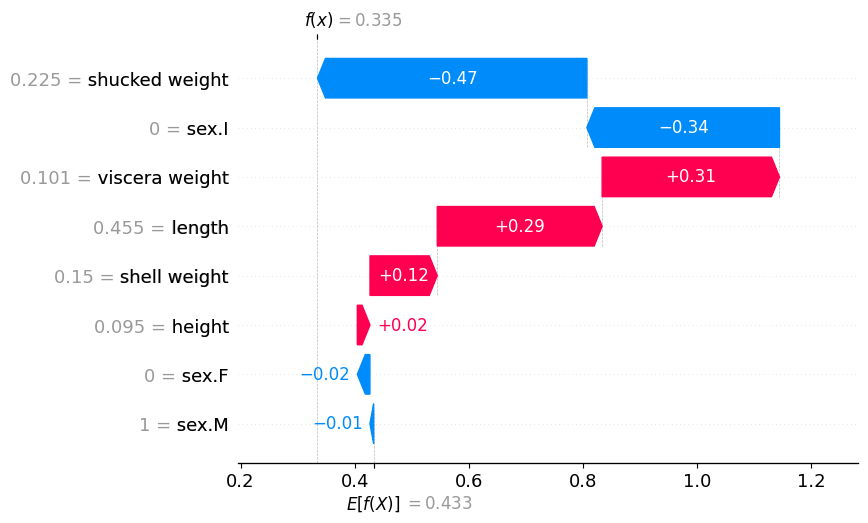

In [23]:
# waterfall plot for first obs
shap.plots.waterfall(shap_values[0, :, 0])

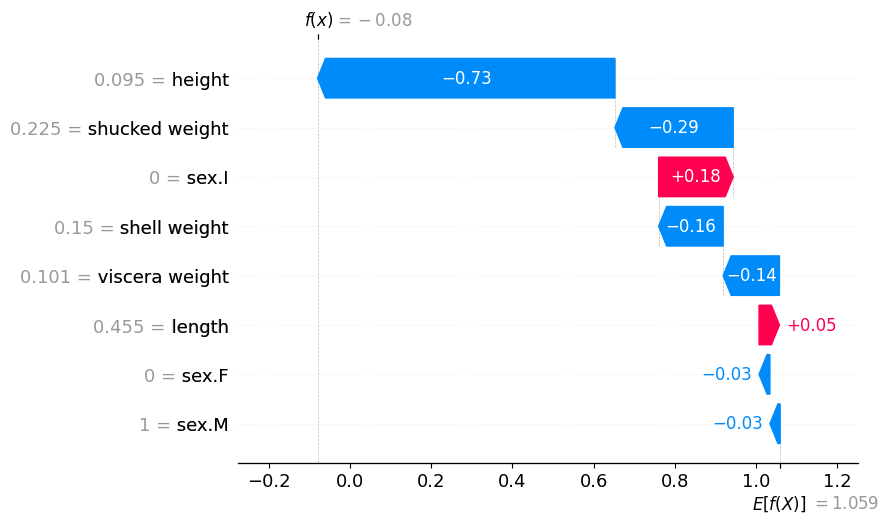

In [24]:
# waterfall plot for first obs
shap.plots.waterfall(shap_values[0, :, 1])

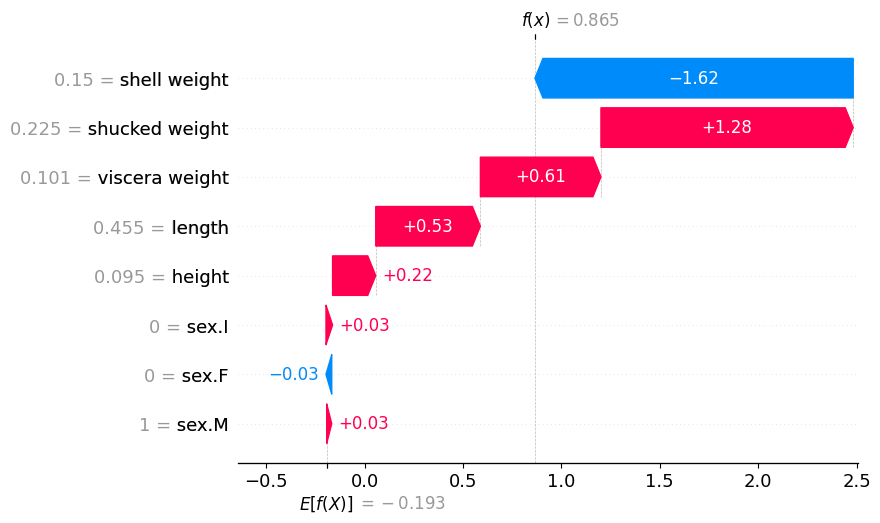

In [25]:
# waterfall plot for first obs
shap.plots.waterfall(shap_values[0, :, 2])

In [26]:
# define softmax function
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

x = [1.383, -0.528, 0.856]
softmax(x)

array([0.57527277, 0.08510147, 0.33962576])

In [39]:
# calculate mean SHAP vales for each class
mean_0 = np.mean(np.abs(shap_values.values[:, :, 0]), axis=0)
mean_1 = np.mean(np.abs(shap_values.values[:, :, 1]), axis=0)
mean_2 = np.mean(np.abs(shap_values.values[:, :, 2]), axis=0)

df = pd.DataFrame({"young": mean_0, "medium": mean_1, "old": mean_2})
df.head()

,young,medium,old
0,0.312080,0.281956,0.355766
1,0.306439,0.151874,0.244537
2,0.502870,0.448552,0.990259
3,0.527047,0.187588,0.319100
4,1.445468,0.504879,1.634818


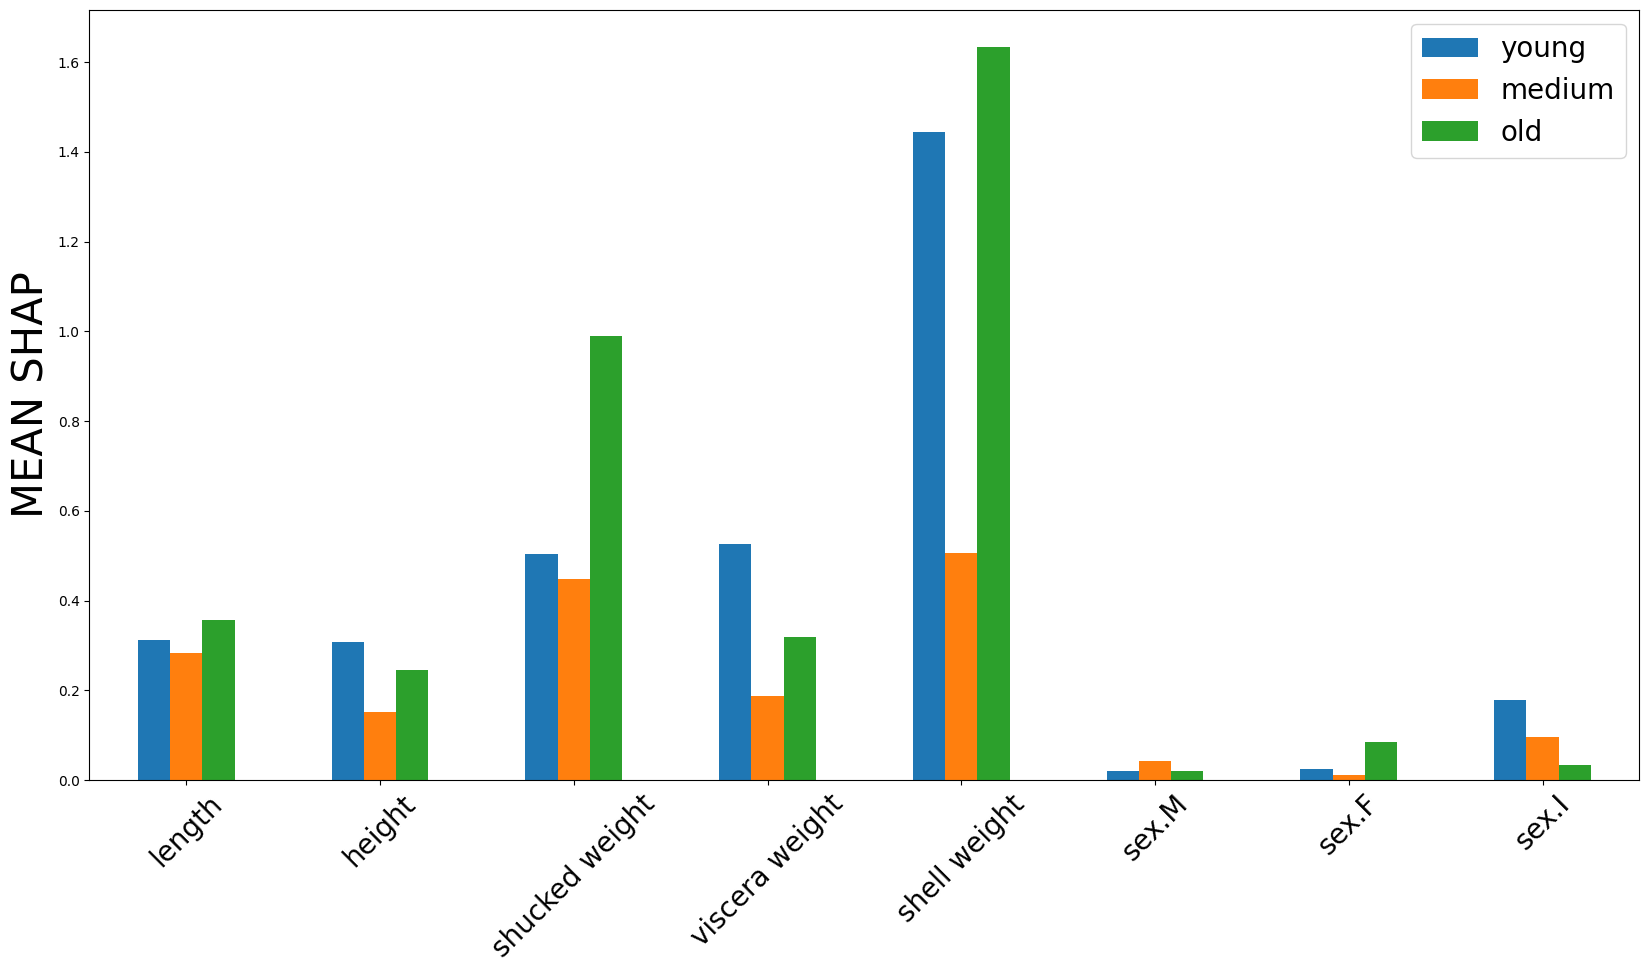

In [41]:
# plot mean SHAP value
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
df.plot.bar(ax=ax)

ax.set_ylabel("MEAN SHAP", size=30)
ax.set_xticklabels(X.columns, rotation=45, size=20)
ax.legend(fontsize=20)
plt.show()

Now we only focus SHAP values for predicted class

In [58]:
# get model prediction
preds = model.predict(X)

new_shap_values = []
for i, pred in enumerate(preds):
    # new_shap_values.append(shap_values.values[i])
    #new_shap_values.append(shap_values.values[i, :, pred])
    new_shap_values.append(shap_values.values[i][:, pred])

(4177, 8)


In [63]:
shap_values.values = np.array(new_shap_values)
print(new_shap_values.shape)

(4177, 8)


In [59]:
new_shap_values[0]

array([ 0.5319682 ,  0.21941717,  1.2824286 ,  0.6129292 , -1.6178434 ,
        0.02558747, -0.02924883,  0.03349659], dtype=float32)

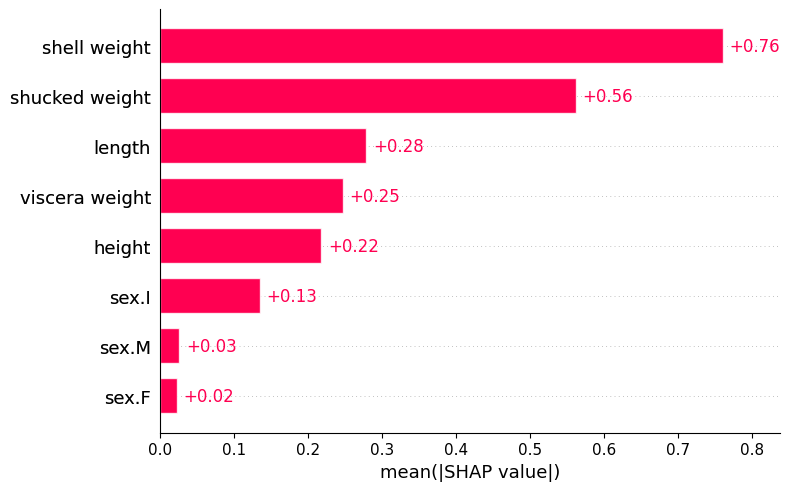

In [65]:
shap.plots.bar(shap_values)

above chart: average contribution to the predicted class

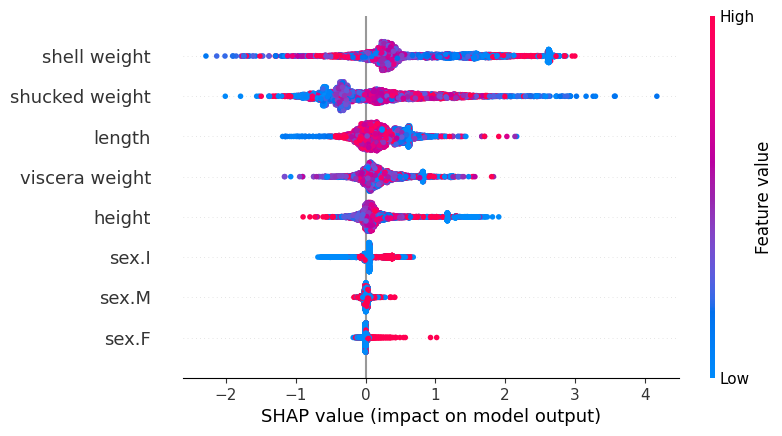

In [66]:
shap.plots.beeswarm(shap_values)

Here we do not see any clear relationship between SHAP and features. This is because the feture will have different relationship depending on the predictive clause. here log shell weight will lead to a higher probability for old prediction.